In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
test_df.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [6]:
train_df.shape

(891, 12)

In [7]:
test_df.shape

(418, 11)

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# sns.pairplot(train_df, hue='Survived', )
# plt.show()

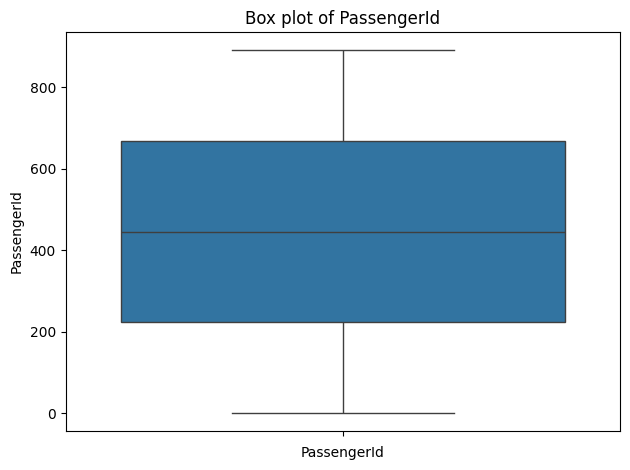

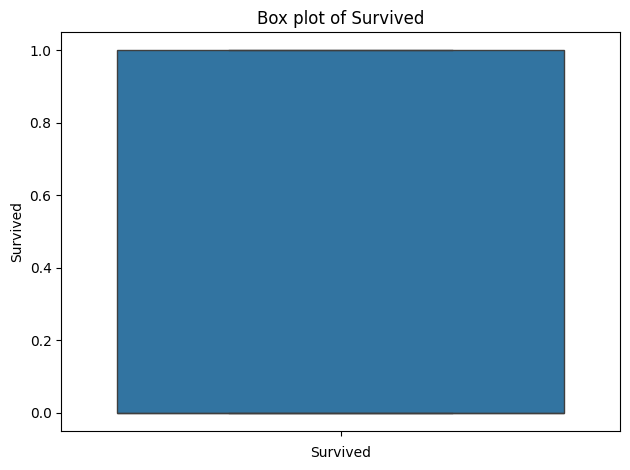

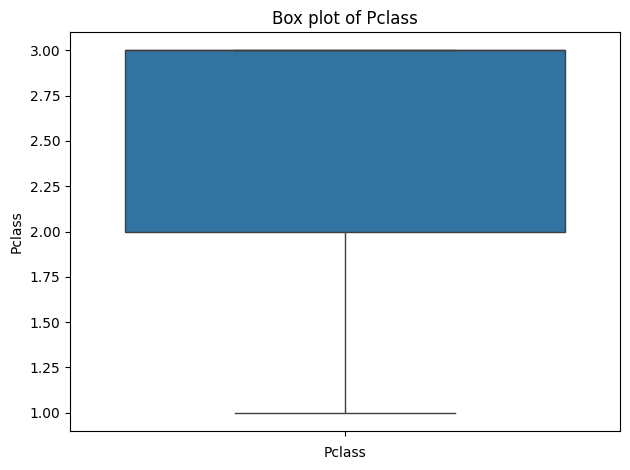

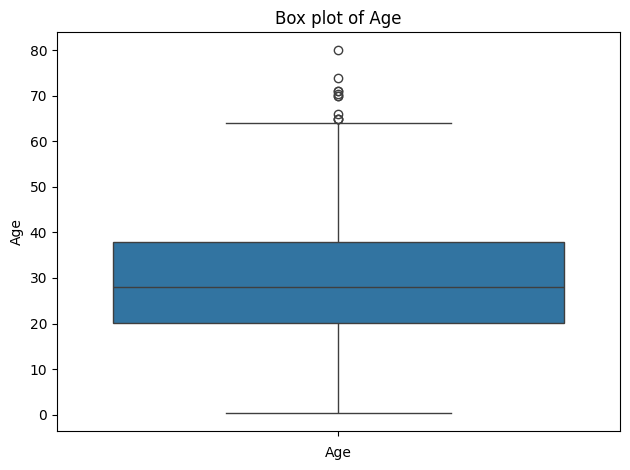

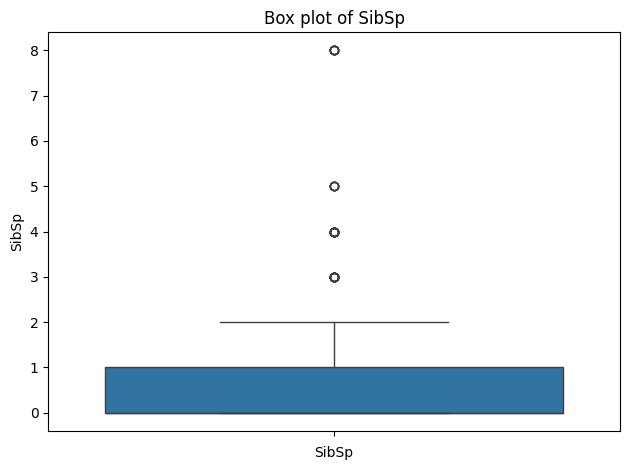

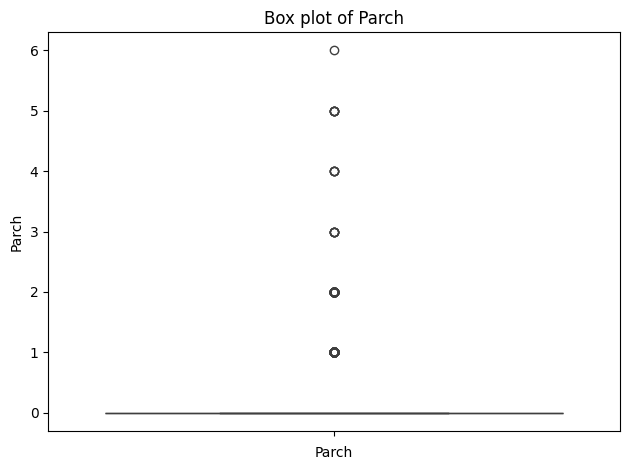

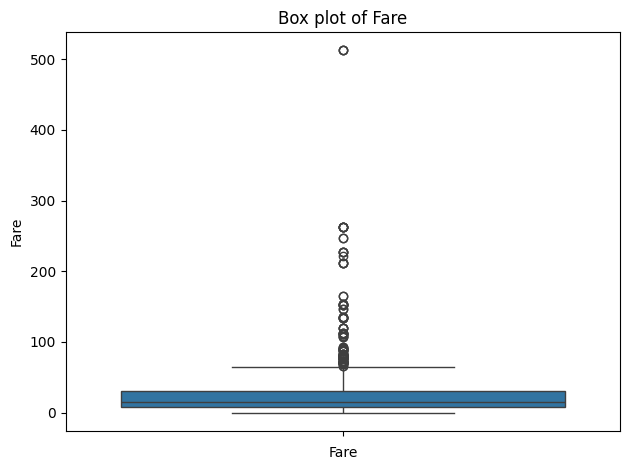

In [14]:
for col in train_df.select_dtypes(include='number').columns:
    sns.boxplot(train_df[col])
    plt.title(f"Box plot of {col}")
    plt.xlabel(f"{col}")
    plt.tight_layout()
    plt.show()

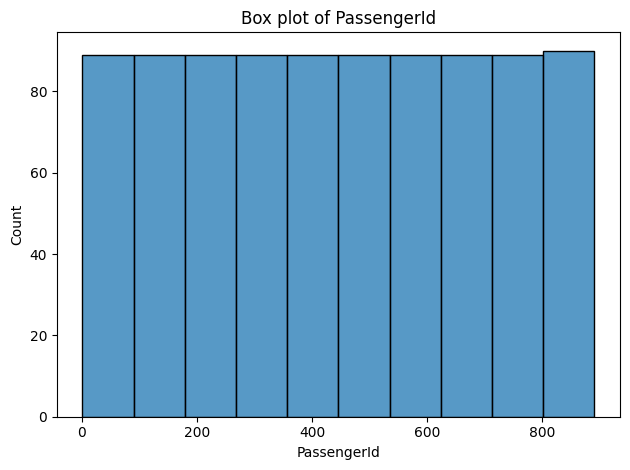

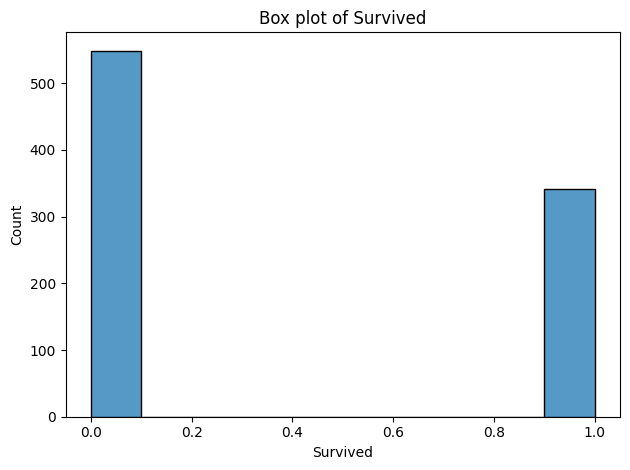

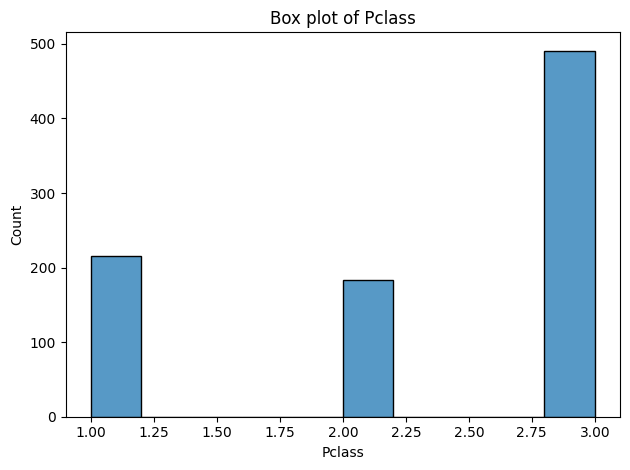

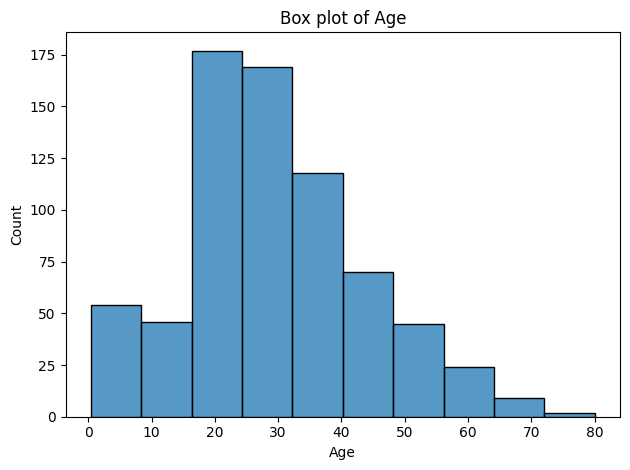

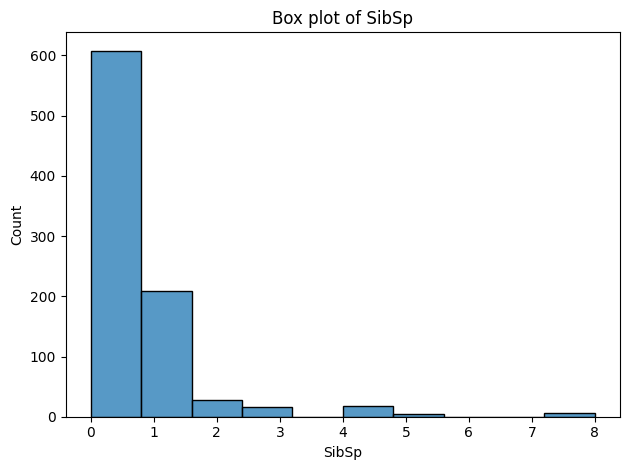

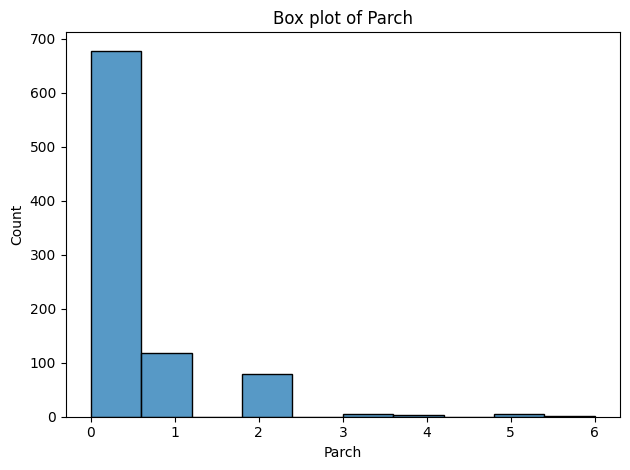

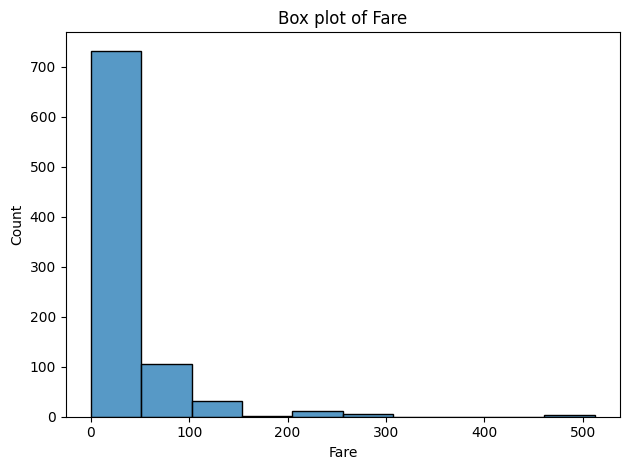

In [15]:
for col in train_df.select_dtypes(include='number').columns:
    sns.histplot(train_df[col], bins=10)
    plt.title(f"Box plot of {col}")
    plt.xlabel(f"{col}")
    plt.tight_layout()
    plt.show()

In [16]:
male = train_df.loc[train_df["Sex"] == 'male', "Survived"].mean() * 100
female = train_df.loc[train_df["Sex"] == 'female', "Survived"].mean() * 100

In [17]:
sex = train_df[['Sex', 'Survived']].value_counts()

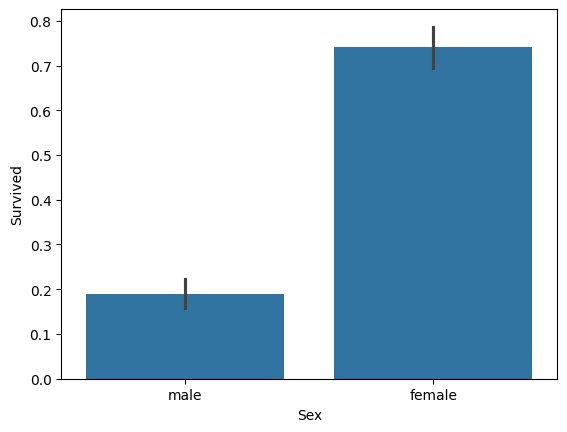

In [18]:
sns.barplot(train_df, x='Sex', y='Survived')
plt.show()

<Axes: xlabel='Survived', ylabel='Sex'>

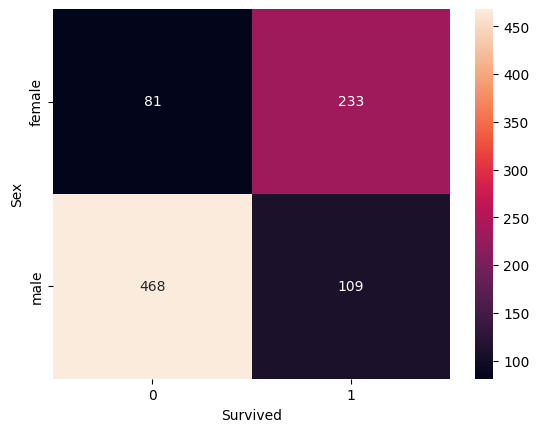

In [19]:
group = train_df.groupby(['Sex', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot= True, fmt= 'd')


In [20]:
print("Percentage of females who survived:",
train_df.loc[train_df["Sex"] == 'female', "Survived"].mean() * 100)

Percentage of females who survived: 74.20382165605095


In [21]:
print("Percentage of males who survived:",
train_df.loc[train_df["Sex"] == 'male', "Survived"].mean() * 100)

Percentage of males who survived: 18.890814558058924


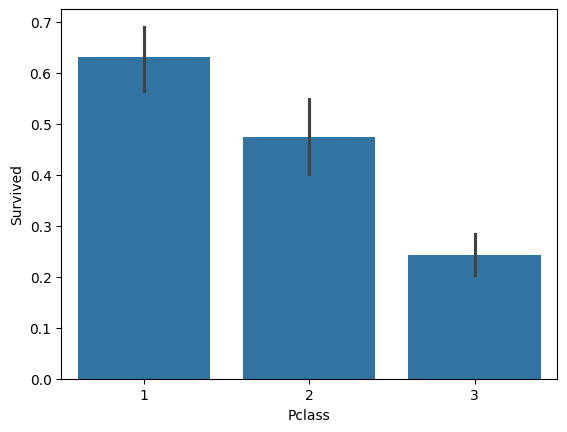

In [22]:
sns.barplot(x="Pclass", y="Survived", data=train_df)
plt.show()

In [23]:
print("Percentage of Pclass = 1 who survived:",
train_df.loc[train_df["Pclass"] == 1, "Survived"].mean()*100)

Percentage of Pclass = 1 who survived: 62.96296296296296


In [24]:
print("Percentage of Pclass = 2 who survived:",
train_df.loc[train_df["Pclass"] == 2, "Survived"].mean()*100)

Percentage of Pclass = 2 who survived: 47.28260869565217


In [25]:
print("Percentage of Pclass = 3 who survived:",
train_df.loc[train_df["Pclass"] == 3, "Survived"].mean()*100)

Percentage of Pclass = 3 who survived: 24.236252545824847


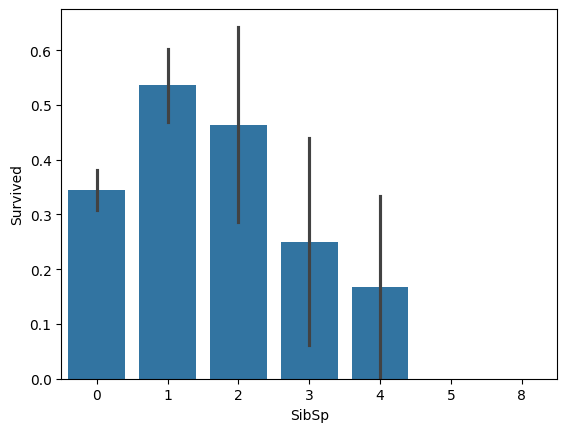

In [26]:
sns.barplot(x="SibSp", y="Survived", data=train_df)
plt.show()

In [27]:
print("Percentage of SibSp = 0 who survived:",
train_df.loc[train_df["SibSp"] == 0,"Survived"].mean()*100)

Percentage of SibSp = 0 who survived: 34.53947368421053


In [28]:
print("Percentage of SibSp = 1 who survived:",
train_df.loc[train_df["SibSp"] == 1,"Survived"].mean()*100)

Percentage of SibSp = 1 who survived: 53.588516746411486


In [29]:
print("Percentage of SibSp = 2 who survived:",
train_df.loc[train_df["SibSp"] == 2,"Survived"].mean()*100)

Percentage of SibSp = 2 who survived: 46.42857142857143


Cleaning Dataset

In [30]:
train_df = train_df.drop(['Cabin', 'Ticket', 'Name', 'Fare'], axis = 1)
test_df = test_df.drop(['Cabin', 'Ticket', 'Name', 'Fare'], axis = 1)

In [31]:
train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S


In [32]:
test_df.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q


In [33]:
print("Number of people embarking in Southampton (S):")
southampton = train_df[train_df["Embarked"] == "S"].shape[0]
print(southampton)

Number of people embarking in Southampton (S):
644


In [34]:
print("Number of people embarking in Cherbourg (C):")
cherbourg = train_df[train_df["Embarked"] == "C"].shape[0]
print(cherbourg)

Number of people embarking in Cherbourg (C):
168


In [35]:
print("Number of people embarking in Queenstown (Q):")
queenstown = train_df[train_df["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Queenstown (Q):
77


In [36]:
train_df['Embarked'] = train_df['Embarked'].map({
    'S': 1,
    'C': 2,
    'Q': 3
})

In [37]:
test_df['Embarked'] = test_df['Embarked'].map({
    'S': 1,
    'C': 2,
    'Q': 3
})

In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,1.0
1,2,1,1,female,38.0,1,0,2.0
2,3,1,3,female,26.0,0,0,1.0
3,4,1,1,female,35.0,1,0,1.0
4,5,0,3,male,35.0,0,0,1.0


In [39]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,3
1,893,3,female,47.0,1,0,1
2,894,2,male,62.0,0,0,3
3,895,3,male,27.0,0,0,1
4,896,3,female,22.0,1,1,1


In [40]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         2
dtype: int64

In [41]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [42]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [43]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       2
dtype: int64

In [44]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [45]:
train_df = train_df.dropna()

In [46]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [47]:
gender = {
    'male': 0,
    'female': 1
}

train_df['Sex'] = train_df['Sex'].map(gender)
test_df['Sex'] = test_df['Sex'].map(gender)

In [48]:
train_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,1.0
1,2,1,1,1,38.0,1,0,2.0
2,3,1,3,1,26.0,0,0,1.0


In [49]:
test_df.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,0,34.5,0,0,3
1,893,3,1,47.0,1,0,1
2,894,2,0,62.0,0,0,3


In [50]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,1.0
1,2,1,1,1,38.0,1,0,2.0
2,3,1,3,1,26.0,0,0,1.0
3,4,1,1,1,35.0,1,0,1.0
4,5,0,3,0,35.0,0,0,1.0


In [51]:
numerical_col = train_df.drop('Survived', axis=1).select_dtypes('number').columns
numerical_col

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

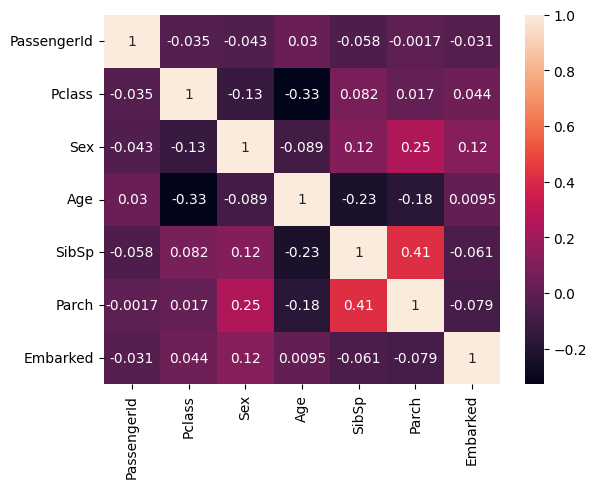

In [52]:
sns.heatmap(data=train_df[numerical_col].corr(), annot=True)
plt.show()

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df[numerical_col] = scaler.fit_transform(train_df[numerical_col])
test_df[numerical_col] = scaler.fit_transform(test_df[numerical_col])
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.000000,0,1.0,0.0,0.271174,0.125,0.000000,0.0
1,0.001124,1,0.0,1.0,0.472229,0.125,0.000000,0.5
2,0.002247,1,1.0,1.0,0.321438,0.000,0.000000,0.0
3,0.003371,1,0.0,1.0,0.434531,0.125,0.000000,0.0
4,0.004494,0,1.0,0.0,0.434531,0.000,0.000000,0.0
...,...,...,...,...,...,...,...,...
886,0.995506,0,0.5,0.0,0.334004,0.000,0.000000,0.0
887,0.996629,1,0.0,1.0,0.233476,0.000,0.000000,0.0
888,0.997753,0,1.0,1.0,0.367921,0.125,0.333333,0.0
889,0.998876,1,0.0,0.0,0.321438,0.000,0.000000,0.5


In [54]:
from sklearn.model_selection import train_test_split

predictors = train_df.drop(['Survived', 'PassengerId'], axis=1)
target = train_df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 42)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [56]:
gaussian = GaussianNB()
logreg = LogisticRegression()
descision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
linear_svc = LinearSVC()
svm = SVC(probability=True)

In [57]:
# Train model 
gaussian.fit(x_train, y_train)
logreg.fit(x_train, y_train)
descision_tree.fit(x_train, y_train)
knn.fit(x_train, y_train)
svm.fit(x_train, y_train)
linear_svc.fit(x_train, y_train)

LinearSVC()

In [58]:
y_val.shape

(178,)

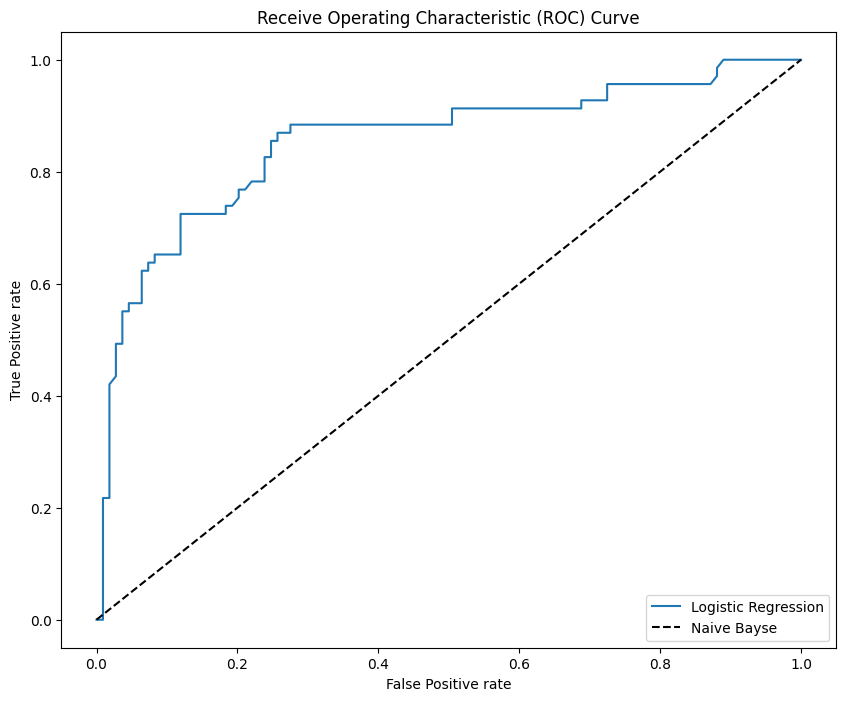

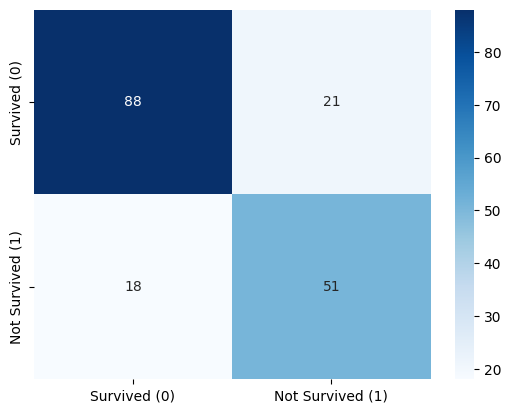

Logistic Regression - Accuracy: 0.78, AUC: 0.85
(178,)


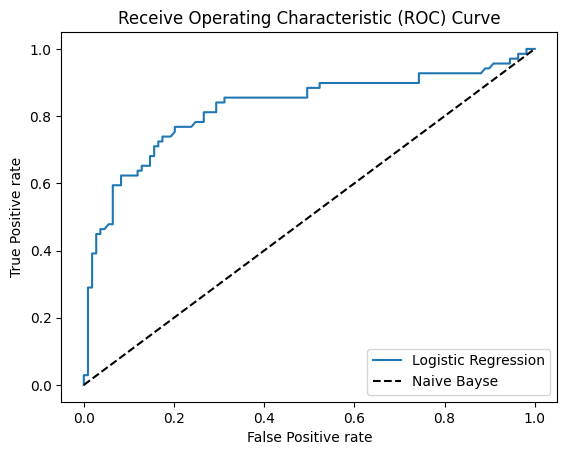

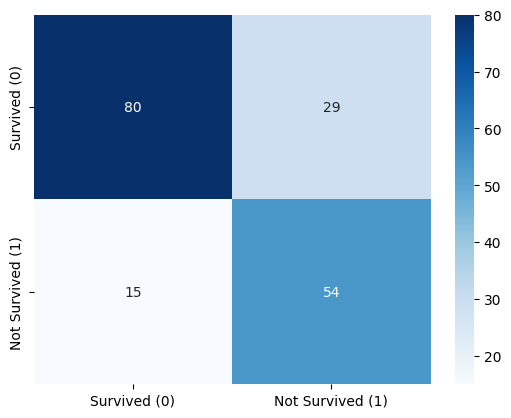

Naive Bayse - Accuracy: 0.75, AUC: 0.82
(178,)


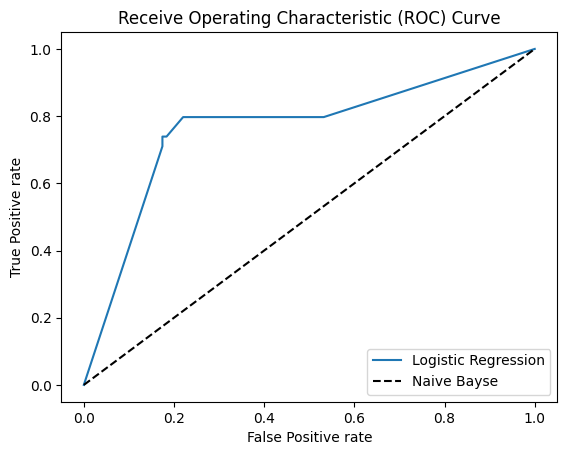

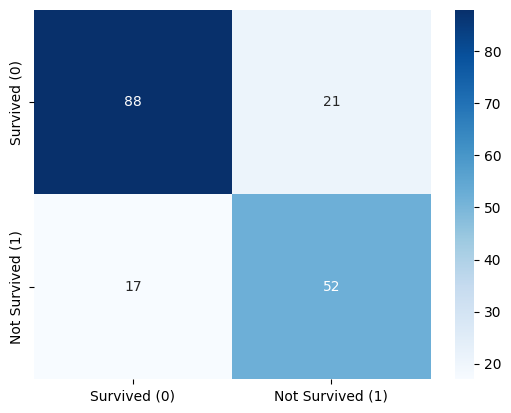

Descision Tree - Accuracy: 0.79, AUC: 0.77
(178,)


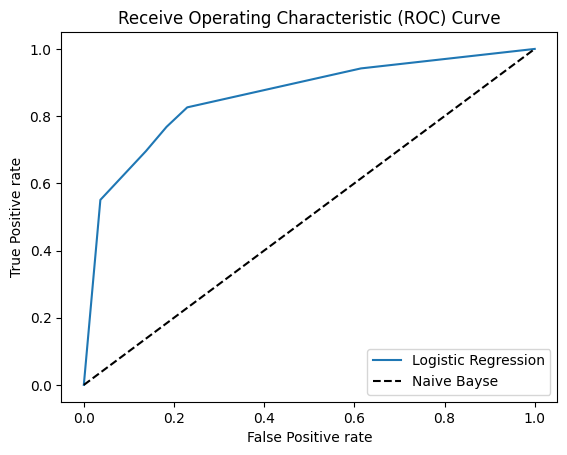

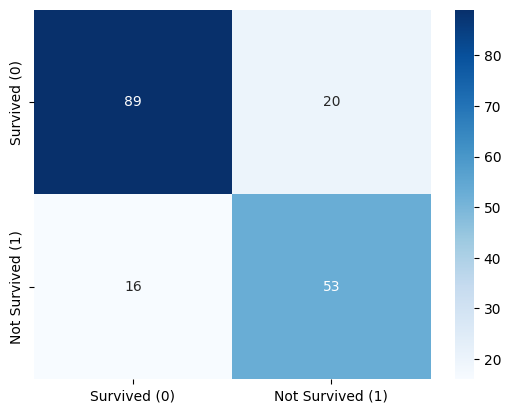

k-NN - Accuracy: 0.80, AUC: 0.86
(178,)


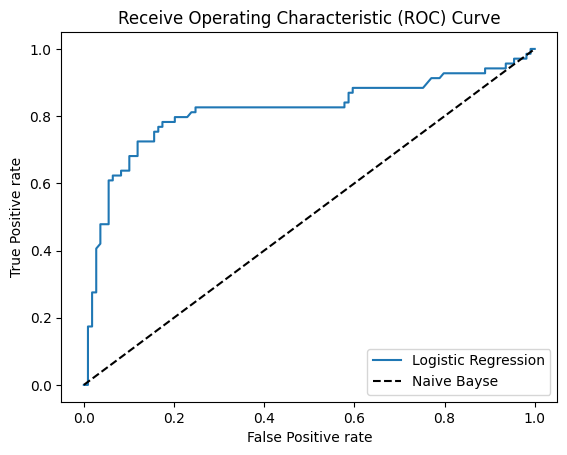

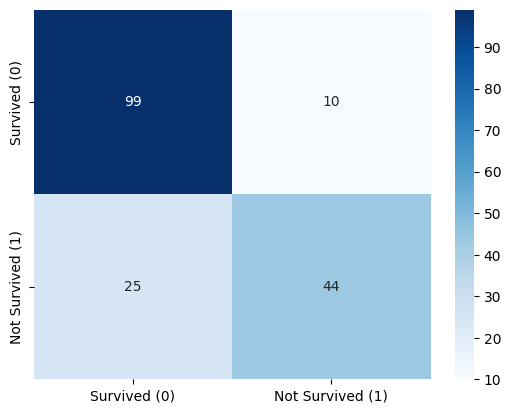

SVM - Accuracy: 0.80, AUC: 0.82
(178,)


In [59]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

models = [
        ("Logistic Regression", logreg), 
        ("Naive Bayse", gaussian),
        ("Descision Tree", descision_tree), 
        ("k-NN", knn), 
        ("SVM", svm)
    ]

plt.figure(figsize=(10, 8))
accuracy_ar = []
for name, model in models:
    y_prod = model.predict_proba(x_val)[:,1]

    fpr, tpr, threshold = roc_curve(y_val, y_prod)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC curve (area={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--') # Dashed Diagonal line
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title('Receive Operating Characteristic (ROC) Curve')
    plt.legend([name for name, _ in models], loc="lower right")
    plt.show()

    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_ar.append(accuracy)
    confusion_mat = confusion_matrix(y_val, y_pred)
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',xticklabels=['Survived (0)', 'Not Survived (1)'], yticklabels=['Survived (0)', 'Not Survived (1)'])
    plt.show()
    print(f"{name} - Accuracy: {accuracy:.2f}, AUC: {roc_auc:.2f}")

    print(y_pred.shape)

In [60]:
accu = pd.DataFrame(accuracy_ar, index=["Logistic Regression", 
        "Naive Bayse",
        "Descision Tree", 
        "k-NN", 
        "SVM",])
accu

,0
Logistic Regression,0.780899
Naive Bayse,0.752809
Descision Tree,0.786517
k-NN,0.797753
SVM,0.803371


<Axes: >

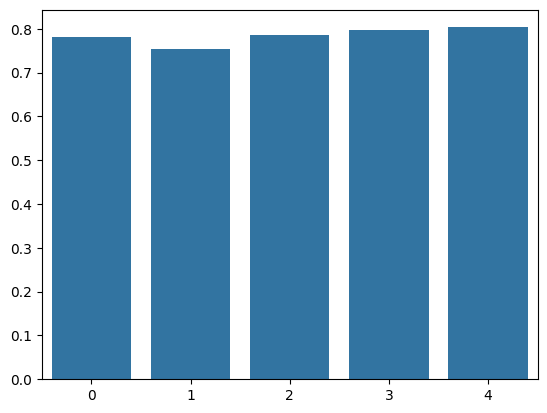

In [61]:
sns.barplot(accuracy_ar)

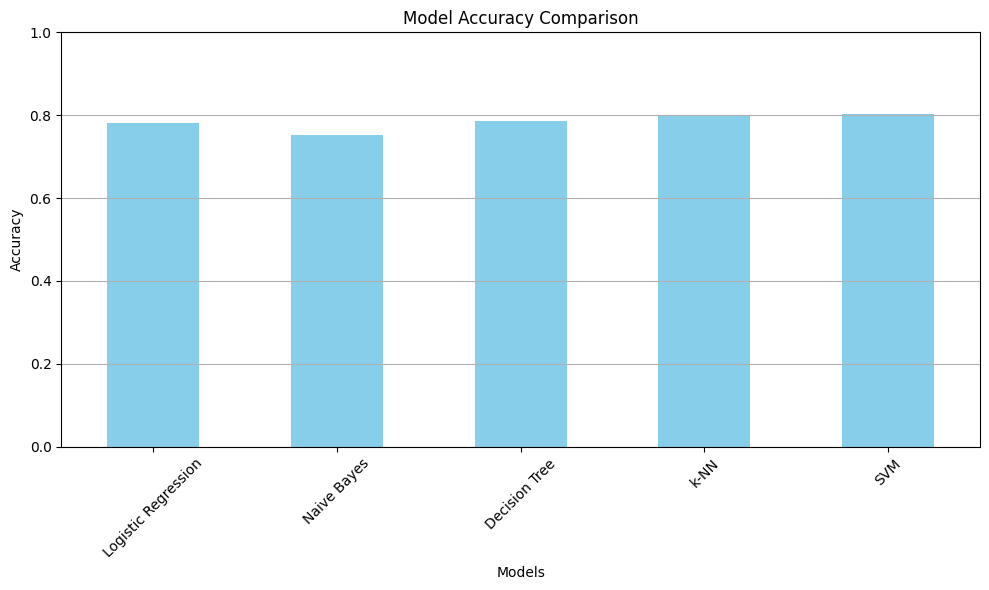

In [62]:
# Create the accuracy DataFrame
accu = pd.DataFrame(accuracy_ar, index=["Logistic Regression", 
                                         "Naive Bayes",
                                         "Decision Tree", 
                                         "k-NN", 
                                         "SVM"], 
                    columns=["Accuracy"])

# Plotting
plt.figure(figsize=(10, 6))
accu['Accuracy'].plot(kind='bar', color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [89]:
from sklearn.ensemble import VotingClassifier


In [93]:
classifiers = []

In [94]:
voting_classifier = VotingClassifier(
    estimators=[('lr', logreg), ('tree', descision_tree), ('gaussian', gaussian), ('kNN', knn), ('svm', svm)],
    voting='hard'
)

voting_classifier.fit(x_train, y_train)

voting_classifier_pred = voting_classifier.predict(x_val)
vote_clasifier_accuracy = accuracy_score(y_pred, y_val)
vote_clasifier_accuracy

voting_socre = voting_classifier.score(x_train, y_train)

classifiers.append(vote_clasifier_accuracy)

print(f"voting_socre: {voting_socre}" )
print(f"vote_clasifier_accuracy: {vote_clasifier_accuracy}")

voting_socre: 0.8551336146272855
vote_clasifier_accuracy: 0.8033707865168539


In [95]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

bagging_classifier = BaggingClassifier(
    estimator=descision_tree,
    max_samples=0.8,
    bootstrap=True,
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
bagging_classifier.fit(x_train, y_train)

bagging_classifier_score = bagging_classifier.score(x_train, y_train)

bagging_classifier_pred = bagging_classifier.predict(x_val)
bagging_classifier_accuracy = accuracy_score(y_pred, y_val)

classifiers.append(bagging_classifier_accuracy)

print(f"bagging_classifier_score: {bagging_classifier_score}" )
print(f"bagging_classifier_accuracy: {bagging_classifier_accuracy}")


bagging_classifier_score: 0.9353023909985936
bagging_classifier_accuracy: 0.8033707865168539


In [96]:
gradient_boosting_classifier = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    random_state=42,
)
gradient_boosting_classifier.fit(x_train, y_train)

gradient_boosting_classifier_score = gradient_boosting_classifier.score(x_train, y_train)
gradient_boosting_classifier_score

gradient_boosting_classifier_pred = gradient_boosting_classifier.predict(x_val)
gradient_boosting_classifier_accuracy = accuracy_score(y_pred, y_val)
gradient_boosting_classifier_accuracy

classifiers.append(gradient_boosting_classifier_accuracy)

print(f"gradient_boosting_classifier_score: {gradient_boosting_classifier_score}" )
print(f"gradient_boosting_classifier_accuracy: {gradient_boosting_classifier_accuracy}")

gradient_boosting_classifier_score: 0.8776371308016878
gradient_boosting_classifier_accuracy: 0.8033707865168539


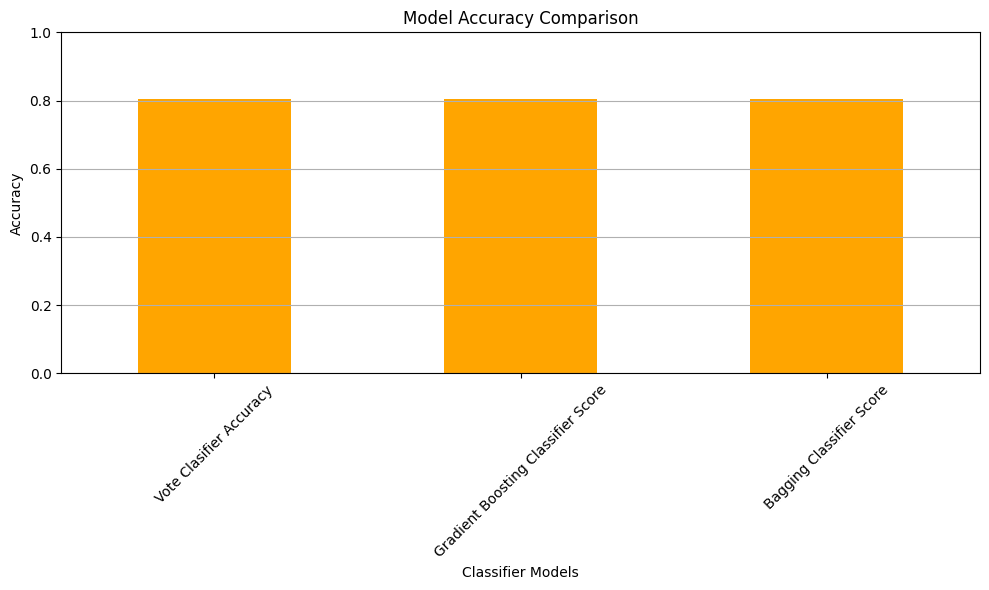

In [98]:
# Create the accuracy DataFrame
accu = pd.DataFrame(classifiers, index=["Vote Clasifier Accuracy", 
                                         "Gradient Boosting Classifier Score",
                                         "Bagging Classifier Score",], 
                    columns=["Accuracy"])

# Plotting
plt.figure(figsize=(10, 6))
accu['Accuracy'].plot(kind='bar', color='orange')
plt.title('Model Accuracy Comparison')
plt.xlabel('Classifier Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()